# Legendre多項式を用いた線型回帰

演習課題の内容は、`linreg_legendre-JA.pdf`を参照すること。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import legendre
import model_linreg
import data
import data_linreg_legendre
import algo_OLS

_fontsize = "xx-large"

In [2]:
data_lin = data_linreg_legendre.gen()
data_lin.X_tr = np.hstack((data_lin.X_tr,
                           np.ones(data_lin.X_tr.shape, dtype=data_lin.X_tr.dtype)))

ylim_vals = [np.min([-0.5, np.min(data_lin.y_tr)-0.25]),
             np.max([4.5, np.max(data_lin.y_tr)+0.25])]

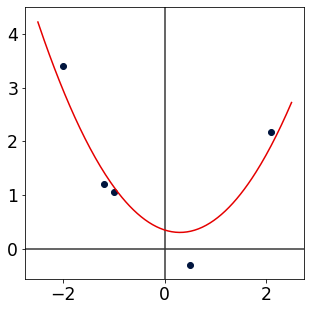

In [3]:
x_range = np.linspace(-2.5, 2.5, 200)
f_range = data_linreg_legendre._f_true(x_range)

myfig = plt.figure(figsize=(5,5))

ax1 = myfig.add_subplot(1,1,1)
ax1.axvline(x=0.0, color="xkcd:dark grey")
ax1.axhline(y=0.0, color="xkcd:dark grey")
ax1.plot(x_range, f_range, color="xkcd:red")
ax1.scatter(data_lin.X_tr[:,0], data_lin.y_tr, color="xkcd:navy")
ax1.tick_params(labelsize=_fontsize)
ax1.set_ylim(ylim_vals)

plt.savefig(fname="slides_leg_example.pdf", bbox_inches="tight")
plt.show()

In [4]:
algo_lin = algo_OLS.OLS()

In [5]:
algo_lin.run(data=data_lin)

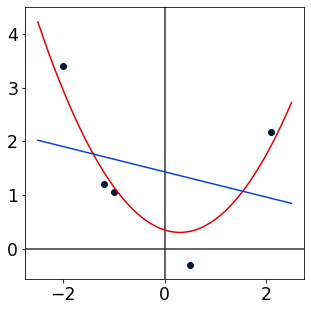

In [6]:
myfig = plt.figure(figsize=(5,5))

fhat_range = x_range * algo_lin.w[0] + algo_lin.w[1]

ax1 = myfig.add_subplot(1,1,1)
ax1.axvline(x=0.0, color="xkcd:dark grey")
ax1.axhline(y=0.0, color="xkcd:dark grey")
ax1.plot(x_range, f_range, color="xkcd:red")
ax1.plot(x_range, fhat_range, color="xkcd:blue")
ax1.scatter(data_lin.X_tr[:,0], data_lin.y_tr, color="xkcd:navy")
ax1.tick_params(labelsize=_fontsize)
ax1.set_ylim(ylim_vals)

plt.savefig(fname="slides_leg_OLSfit.pdf", bbox_inches="tight")
plt.show()

In [7]:
# Setup of the Legendre polynomial features.
_deg = 4
data_leg = data.DataSet(X_tr=legendre.leg(x=np.take(data_lin.X_tr, [0], axis=1),
                                          deg=_deg),
                        y_tr=np.copy(data_lin.y_tr))

In [8]:
# Solve using OLS.
algo_leg = algo_OLS.OLS()

In [9]:
algo_leg.run(data=data_leg)

In [10]:
fhat_leg_range = legendre.leg(x=x_range.reshape((x_range.size,1)),
                              deg=_deg).dot(algo_leg.w)

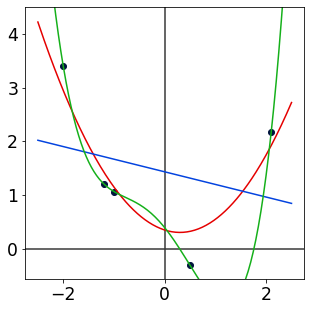

In [11]:
myfig = plt.figure(figsize=(5,5))

ax1 = myfig.add_subplot(1,1,1)
ax1.axvline(x=0.0, color="xkcd:dark grey")
ax1.axhline(y=0.0, color="xkcd:dark grey")
ax1.plot(x_range, f_range, color="xkcd:red")
ax1.plot(x_range, fhat_range, color="xkcd:blue")
ax1.plot(x_range, fhat_leg_range, color="xkcd:green")
ax1.scatter(data_lin.X_tr[:,0], data_lin.y_tr, color="xkcd:navy")
ax1.tick_params(labelsize=_fontsize)
ax1.set_ylim(ylim_vals)

plt.savefig(fname="slides_leg_nonlin_deg{}.pdf".format(_deg), bbox_inches="tight")
plt.show()

In [12]:
# Solve using Ridge regression.
_lamreg = "big"
_lamreg_dict = {"none":0.0, "small": 0.01, "med": 0.1, "big": 10.0}
algo_ridge = algo_OLS.Ridge(lamreg=_lamreg_dict[_lamreg])

In [13]:
algo_ridge.run(data=data_leg)

In [14]:
fhat_ridge_range = legendre.leg(x=x_range.reshape((x_range.size,1)),
                                deg=_deg).dot(algo_ridge.w)

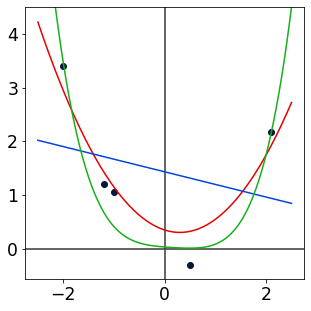

In [15]:
myfig = plt.figure(figsize=(5,5))

ax1 = myfig.add_subplot(1,1,1)
ax1.axvline(x=0.0, color="xkcd:dark grey")
ax1.axhline(y=0.0, color="xkcd:dark grey")
ax1.plot(x_range, f_range, color="xkcd:red")
ax1.plot(x_range, fhat_range, color="xkcd:blue")
ax1.plot(x_range, fhat_ridge_range, color="xkcd:green")
ax1.scatter(data_lin.X_tr[:,0], data_lin.y_tr, color="xkcd:navy")
ax1.tick_params(labelsize=_fontsize)
ax1.set_ylim(ylim_vals)

plt.savefig(fname="slides_leg_nonlin_deg{}_reg_{}.pdf".format(_deg, _lamreg),
            bbox_inches="tight")
plt.show()

___